In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing the datasets
applicationData = pd.read_csv("/content/drive/MyDrive/BDA_exp/applicationData.csv")
previousApplication = pd.read_csv("/content/drive/MyDrive/BDA_exp/previousApplication.csv")
data = pd.read_csv("/content/drive/MyDrive/BDA_exp/data.csv")

In [ ]:
data.shape

(956121, 79)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956121 entries, 0 to 956120
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    956121 non-null  int64  
 1   Unnamed: 0_x                  956121 non-null  int64  
 2   SK_ID_CURR                    956121 non-null  int64  
 3   TARGET                        956121 non-null  int64  
 4   NAME_CONTRACT_TYPE_x          956121 non-null  object 
 5   CODE_GENDER                   956121 non-null  object 
 6   FLAG_OWN_CAR                  956121 non-null  object 
 7   FLAG_OWN_REALTY               956121 non-null  object 
 8   CNT_CHILDREN                  956121 non-null  int64  
 9   AMT_INCOME_TOTAL              956121 non-null  float64
 10  AMT_CREDIT_x                  956121 non-null  float64
 11  AMT_ANNUITY_x                 956121 non-null  float64
 12  AMT_GOODS_PRICE_x             956121 non-nul

In [ ]:
previousApplication.shape

(1670214, 34)

In [ ]:
previousApplication.head()

,Unnamed: 0,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,365243.0,-831.0,-361.0,-537.0,-499.0,0.0


In [ ]:
previousApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1670214 non-null  int64  
 1   SK_ID_PREV                   1670214 non-null  int64  
 2   SK_ID_CURR                   1670214 non-null  int64  
 3   NAME_CONTRACT_TYPE           1670214 non-null  object 
 4   AMT_ANNUITY                  1670214 non-null  float64
 5   AMT_APPLICATION              1670214 non-null  float64
 6   AMT_CREDIT                   1670214 non-null  float64
 7   AMT_GOODS_PRICE              1670214 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  NAME_CASH_LOAN_PURPOSE       1670214 non-n

**Concatenating applicationData and previousApplication**

In [ ]:
#Joining the two data sets by a common column (SK_ID_CURR) for further comparison and analysis

# data = pd.merge(applicationData, previousApplication, on = 'SK_ID_CURR', how = 'inner')
# data.sort_values(by = ['SK_ID_CURR','SK_ID_PREV'], ascending = [True, True], inplace = True)

In [ ]:
# data.head(10) #THE COMBINED DATASET

,Unnamed: 0_x,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,...,Auto technology,24.00,low_normal,POS other with interest,365243.00,-565.00,125.00,-25.00,-17.00,0.00
1,1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,...,XNA,12.00,low_normal,Cash X-Sell: low,365243.00,-716.00,-386.00,-536.00,-527.00,1.00
3,1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,...,Consumer electronics,12.00,middle,POS household with interest,365243.00,-2310.00,-1980.00,-1980.00,-1976.00,1.00
2,1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,...,Furniture,6.00,middle,POS industry with interest,365243.00,-797.00,-647.00,-647.00,-639.00,0.00
4,2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,...,Connectivity,4.00,middle,POS mobile without interest,365243.00,-784.00,-694.00,-724.00,-714.00,0.00
9,3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,...,XNA,18.00,high,Cash X-Sell: high,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
10,3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,...,XNA,16.05,XNA,Cash,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
8,3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,...,XNA,0.00,XNA,Card X-Sell,365243.00,365243.00,365243.00,365243.00,365243.00,0.00
13,3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,...,XNA,48.00,low_normal,Cash X-Sell: low,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
5,3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,...,XNA,48.00,low_normal,Cash X-Sell: low,365243.00,-151.00,1259.00,-151.00,-143.00,0.00


In [ ]:
# data.to_csv('/content/drive/MyDrive/BDA_exp/data.csv')
data.head()

,Unnamed: 0,Unnamed: 0_x,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,0,100002,1,Cash loans,M,N,Y,0,202500.0,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,1,1,100003,0,Cash loans,F,N,N,0,270000.0,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,3,1,100003,0,Cash loans,F,N,N,0,270000.0,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,2,1,100003,0,Cash loans,F,N,N,0,270000.0,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
4,4,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


#**PCA**

In [ ]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
data.info

<bound method DataFrame.info of         Unnamed: 0  Unnamed: 0_x  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x  \
0                0             0      100002       1           Cash loans   
1                1             1      100003       0           Cash loans   
2                3             1      100003       0           Cash loans   
3                2             1      100003       0           Cash loans   
4                4             2      100004       0      Revolving loans   
...            ...           ...         ...     ...                  ...   
956116      956117        307510      456255       0           Cash loans   
956117      956113        307510      456255       0           Cash loans   
956118      956116        307510      456255       0           Cash loans   
956119      956119        307510      456255       0           Cash loans   
956120      956120        307510      456255       0           Cash loans   

       CODE_GENDER FLAG_OWN_CAR FLAG_OWN_RE

In [ ]:
#Reading few columns
fields = ['AMT_INCOME_TOTAL','AMT_CREDIT_y','AMT_ANNUITY_y','AMT_GOODS_PRICE_y','TARGET']
df = pd.read_csv('/content/drive/MyDrive/BDA_exp/data.csv', skipinitialspace=True, usecols=fields)
print(df.keys())

Index(['TARGET', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY_y', 'AMT_CREDIT_y',
       'AMT_GOODS_PRICE_y'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956121 entries, 0 to 956120
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TARGET             956121 non-null  int64  
 1   AMT_INCOME_TOTAL   956121 non-null  float64
 2   AMT_ANNUITY_y      956121 non-null  float64
 3   AMT_CREDIT_y       956121 non-null  float64
 4   AMT_GOODS_PRICE_y  956121 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 36.5 MB


In [ ]:
print(df)

        TARGET  AMT_INCOME_TOTAL  AMT_ANNUITY_y  AMT_CREDIT_y  \
0            1          202500.0       9251.775      179055.0   
1            0          270000.0      98356.995     1035882.0   
2            0          270000.0       6737.310       68053.5   
3            0          270000.0      64567.665      348637.5   
4            0           67500.0       5357.250       20106.0   
...        ...               ...            ...           ...   
956116       0          157500.0       2250.000       45000.0   
956117       0          157500.0      11090.835      112815.0   
956118       0          157500.0      16400.610      254340.0   
956119       0          157500.0      54022.140     1271929.5   
956120       0          157500.0      11514.555       58545.0   

        AMT_GOODS_PRICE_y  
0                179055.0  
1                900000.0  
2                 68809.5  
3                337500.0  
4                 24282.0  
...                   ...  
956116            45000

In [ ]:
import tracemalloc
import datetime 

#Reading few columns
fields = ['AMT_INCOME_TOTAL','AMT_CREDIT_y','AMT_ANNUITY_y','AMT_GOODS_PRICE_y','TARGET']
df = pd.read_csv('/content/drive/MyDrive/BDA_exp/data.csv', skipinitialspace=True, usecols=fields)
print(df.keys())
# starting the monitoring
tracemalloc.start()
start_time = datetime.datetime.now()

from sklearn.preprocessing import StandardScaler
features = names=['AMT_INCOME_TOTAL','AMT_CREDIT_y','AMT_ANNUITY_y','AMT_GOODS_PRICE_y']
# Separating out the features
x = df.loc[:, features].values
print(x)
# Separating out the target
y = df.loc[:,['TARGET']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(principalDf)
finalDf = pd.concat([principalDf, df[['TARGET']]], axis = 1)
print(finalDf)
pca.explained_variance_ratio_


end_time = datetime.datetime.now()

time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000

print('\nExecution Time',execution_time)
print('Execution memory',tracemalloc.get_traced_memory())
 
# stopping the library
tracemalloc.stop()

Index(['TARGET', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY_y', 'AMT_CREDIT_y',
       'AMT_GOODS_PRICE_y'],
      dtype='object')
[[ 202500.     179055.       9251.775  179055.   ]
 [ 270000.    1035882.      98356.995  900000.   ]
 [ 270000.      68053.5      6737.31    68809.5  ]
 ...
 [ 157500.     254340.      16400.61   229500.   ]
 [ 157500.    1271929.5     54022.14  1170000.   ]
 [ 157500.      58545.      11514.555   58225.5  ]]
[[ 0.09922309 -0.04960811 -0.41760655 -0.27461974]
 [ 0.39426512  2.60689329  6.22172277  2.21563862]
 [ 0.39426512 -0.39375651 -0.60496214 -0.65542518]
 ...
 [-0.09747159  0.18380506  0.11506112 -0.10037471]
 [-0.09747159  3.33873357  2.91828328  3.14826144]
 [-0.09747159 -0.42323661 -0.24900429 -0.69198399]]
        principal component 1  principal component 2
0                   -0.414700               0.125821
1                    6.346636              -0.029001
2                   -0.918181               0.464578
3                    2.557595              

In [ ]:
from sklearn.preprocessing import StandardScaler
features = names=['AMT_INCOME_TOTAL','AMT_CREDIT_y','AMT_ANNUITY_y','AMT_GOODS_PRICE_y']

In [ ]:
# Separating out the features
x = df.loc[:, features].values
print(x)

[[ 202500.     179055.       9251.775  179055.   ]
 [ 270000.    1035882.      98356.995  900000.   ]
 [ 270000.      68053.5      6737.31    68809.5  ]
 ...
 [ 157500.     254340.      16400.61   229500.   ]
 [ 157500.    1271929.5     54022.14  1170000.   ]
 [ 157500.      58545.      11514.555   58225.5  ]]


In [ ]:
# Separating out the target
y = df.loc[:,['TARGET']].values

In [ ]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
print(x)

[[ 0.09922309 -0.04960811 -0.41760655 -0.27461974]
 [ 0.39426512  2.60689329  6.22172277  2.21563862]
 [ 0.39426512 -0.39375651 -0.60496214 -0.65542518]
 ...
 [-0.09747159  0.18380506  0.11506112 -0.10037471]
 [-0.09747159  3.33873357  2.91828328  3.14826144]
 [-0.09747159 -0.42323661 -0.24900429 -0.69198399]]


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

print(principalDf)

        principal component 1  principal component 2
0                   -0.414700               0.125821
1                    6.346636              -0.029001
2                   -0.918181               0.464578
3                    2.557595               0.260119
4                   -1.221662              -0.398189
...                       ...                    ...
956116              -1.234835              -0.008848
956117              -0.626391              -0.047605
956118               0.107647              -0.106173
956119               5.409754              -0.530439
956120              -0.794401              -0.030472

[956121 rows x 2 columns]


In [ ]:
finalDf = pd.concat([principalDf, df[['TARGET']]], axis = 1)
print(finalDf)

        principal component 1  principal component 2  TARGET
0                   -0.414700               0.125821       1
1                    6.346636              -0.029001       0
2                   -0.918181               0.464578       0
3                    2.557595               0.260119       0
4                   -1.221662              -0.398189       0
...                       ...                    ...     ...
956116              -1.234835              -0.008848       0
956117              -0.626391              -0.047605       0
956118               0.107647              -0.106173       0
956119               5.409754              -0.530439       0
956120              -0.794401              -0.030472       0

[956121 rows x 3 columns]


In [ ]:
pca.explained_variance_ratio_

array([0.65681346, 0.24758628])

# **LSH**

In [ ]:
# Installing required package
!pip install datasketch
# Importing required libraries
import numpy as np
import pandas as pd
import re
import time
from datasketch import MinHash, MinHashLSHForest
# Importing and reading the dataset csv file
db = pd.read_csv('/content/drive/MyDrive/BDA_exp/data.csv')

# Shape of dataset
print('Dataset Shape : ',db.shape)


     |████████████████████████████████| 75 kB 2.5 MB/s 
Dataset Shape :  (956121, 79)


In [ ]:
# Implementing LSH
# Preprocess will split a string of text into individual tokens/shingles based on whitespace.
def preprocess(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens

# Creating the Minhash Forest
def get_forest(data, perms):
    start_time = time.time()
    minhash = []
    for text in data['text']:
        # Preprocessing the text
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)
    forest = MinHashLSHForest(num_perm=perms)
    for i,m in enumerate(minhash):
        forest.add(i,m)
    forest.index()
    print('It took %s seconds to build the forest.' %(time.time()-start_time))
    return forest

# Evaluate Queries
def predict(text, database, perms, num_results, forest):
    start_time = time.time()
    # Preprocessing the input text
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if query is empty, return none
    # Returning the status
    
    result = 'STATUS : ' + database.iloc[idx_array]['NAME_CONTRACT_STATUS']
    print('It took %s seconds to query forest.' %(time.time()-start_time))
    return result

In [ ]:
# Testing the Recommendation Engine

db['text'] = db['NAME_CONTRACT_TYPE_x']+' '+ db['NAME_INCOME_TYPE'] + ' ' + db['NAME_EDUCATION_TYPE'] + ' ' + db['NAME_FAMILY_STATUS'] + ' '+ db['NAME_CONTRACT_STATUS']

# Choosing parameters 
#Number of Permutations, standard number of permutations of 128
permutations = 128
#Number of Recommendations to return
num_recommendations = 3

# Building Min Hash forest
forest = get_forest(db, permutations)

# Giving input of a movie name
test_input = 'Cash loans State servant Higher education Married Approved'
print('\nInput : ',test_input)
result = predict(test_input, db, permutations, num_recommendations, forest)
print('\nTop Recommendation(s) is(are) \n')
print(result)


It took 1201.6229832172394 seconds to build the forest.

Input :  1 Cash loans State servant Higher education Married Approved
It took 0.4717400074005127 seconds to query forest.

Top Recommendation(s) is(are) 

1    STATUS : Approved
2    STATUS : Approved
3    STATUS : Approved
Name: NAME_CONTRACT_STATUS, dtype: object


# **Majority**

In [ ]:
import tracemalloc
import datetime 
# code or function for which memory
# has to be monitored
def app():
    lt = []
    for i in range(0, 100000):
        lt.append(i)
 
# starting the monitoring
tracemalloc.start()
start_time = datetime.datetime.now()
def majority(x):
    c=0
    for i in range(len(x)):
        if c==0:
            alpha=x[i]
            c=1
        elif x[i]==alpha:
            c=c+1
        else:
            c=c-1
    return([alpha,c])

cols=['CODE_GENDER','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','CNT_CHILDREN','OCCUPATION_TYPE','NAME_FAMILY_STATUS','NAME_CONTRACT_TYPE_y','NAME_CLIENT_TYPE']
for co in cols:
  print(co)
  ans=majority(data[co])
  print(ans)
  print("Majority element ",ans[0]," Counter: ",ans[1],"\n")

end_time = datetime.datetime.now()

time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000

print('\nExecution Time',execution_time)
print('Execution memory',tracemalloc.get_traced_memory())
 
# stopping the library
tracemalloc.stop()

CODE_GENDER
['F', 235923]
Majority element  F  Counter:  235923 

AMT_INCOME_TOTAL
[157500.0, 7]
Majority element  157500.0  Counter:  7 

NAME_INCOME_TYPE
['Working', 266405]
Majority element  Working  Counter:  266405 

CNT_CHILDREN
[0, 277413]
Majority element  0  Counter:  277413 

OCCUPATION_TYPE
['Laborers', 9]
Majority element  Laborers  Counter:  9 

NAME_FAMILY_STATUS
['Married', 311519]
Majority element  Married  Counter:  311519 

NAME_CONTRACT_TYPE_y
['Consumer loans', 7]
Majority element  Consumer loans  Counter:  7 

NAME_CLIENT_TYPE
['Repeater', 435417]
Majority element  Repeater  Counter:  435417 


Execution Time 33483.422
Execution memory (27646, 80395)


#**Misra-Gries**

In [ ]:
import tracemalloc
import datetime 
# code or function for which memory
# has to be monitored
def app():
    lt = []
    for i in range(0, 100000):
        lt.append(i)
 
# starting the monitoring
tracemalloc.start()
start_time = datetime.datetime.now()
from collections import Counter
def mg(x):
    #k=int(input('Enter the value of k:'))
    k=10
    counters = Counter()
    for item in x:
        ## case 1: item already has counter or there are empty counters
        if item in counters or len(counters) < k:
            counters[item] += 1
        ## case 2: item doesn't have counter and there are no empty counters
        else:
            for key in list(counters.keys()):
                counters[key] -= 1
                counters["decrements"]+=1
                if counters[key] == 0:
                    del counters[key]
    return counters


cols=['CODE_GENDER','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','OCCUPATION_TYPE','NAME_FAMILY_STATUS','NAME_CONTRACT_TYPE_y','NAME_CLIENT_TYPE']

print('For calculating the majority using Misra-Gries')
for co in cols:
  ans=mg(data[co])
  print('')
  print(co)
  print(ans)
  temp=0
  for item in ans:
    if ans[item]>temp:
      temp=ans[item]
  print("Majority element ",item," Counter: ",ans[item])
#ans=mg(df['stroke'])
#print("\nThe majoriy type of attack:")
#print(ans)

end_time = datetime.datetime.now()

time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000

print('\nExecution Time',execution_time)

print('Execution memory',tracemalloc.get_traced_memory())
 
# stopping the library
tracemalloc.stop()

For calculating the majority using Misra-Gries

CODE_GENDER
Counter({'F': 596022, 'M': 360099})
Majority element  F  Counter:  596022

AMT_INCOME_TOTAL
Counter({'decrements': 843499, 135000.0: 18553, 112500.0: 165, 157500.0: 136, 225000.0: 20, 90000.0: 15, 180000.0: 4, 81000.0: 3, 153000.0: 3, 360000.0: 1})
Majority element  153000.0  Counter:  3

NAME_INCOME_TYPE
Counter({'Working': 611263, 'Commercial associate': 266688, 'State servant': 78089, 'Pensioner': 47, 'Student': 18, 'Maternity leave': 16})
Majority element  Maternity leave  Counter:  16

OCCUPATION_TYPE
Counter({'decrements': 461008, 'Laborers': 200076, 'Sales staff': 100135, 'Core staff': 67049, 'Managers': 43718, 'Drivers': 32844, 'Medicine staff': 42, 'Cooking staff': 14, 'Security staff': 11, 'Low-skill Laborers': 1})
Majority element  Low-skill Laborers  Counter:  1

NAME_FAMILY_STATUS
Counter({'Married': 633814, 'Single / not married': 131005, 'Civil marriage': 104173, 'Separated': 59770, 'Widow': 27359})
Majority ele

#**Bloom Filter**

In [ ]:
!pip install bitarray
!pip install mmh3

     |████████████████████████████████| 223 kB 4.9 MB/s 
     |████████████████████████████████| 50 kB 2.8 MB/s 


In [ ]:
from bitarray import bitarray
import mmh3
import pandas as pd
import numpy as np

In [ ]:
def bloom_filter(size,bit_array):
   for ii in range(7):
    index=mmh3.hash(co,ii)%size
    bit_array[index]=1

cols=data['SK_ID_CURR'].unique()
print(len(cols))
size=150000
bit_array=bitarray(150000)
product=np.array(cols)
bit_array.setall(0)
for co in cols:
  bloom_filter(size,bit_array)
  np.append(product,co)

199817


In [ ]:
for prod in cols:
  if prod in product:
    print(prod,"is in Bloom Filter as expected")
  else:
    print(prod,"is True Negative ")

Streaming output truncated to the last 5000 lines.
447207 is in Bloom Filter as expected
447211 is in Bloom Filter as expected
447212 is in Bloom Filter as expected
447213 is in Bloom Filter as expected
447214 is in Bloom Filter as expected
447215 is in Bloom Filter as expected
447217 is in Bloom Filter as expected
447218 is in Bloom Filter as expected
447222 is in Bloom Filter as expected
447224 is in Bloom Filter as expected
447226 is in Bloom Filter as expected
447229 is in Bloom Filter as expected
447231 is in Bloom Filter as expected
447232 is in Bloom Filter as expected
447233 is in Bloom Filter as expected
447234 is in Bloom Filter as expected
447238 is in Bloom Filter as expected
447240 is in Bloom Filter as expected
447241 is in Bloom Filter as expected
447242 is in Bloom Filter as expected
447247 is in Bloom Filter as expected
447249 is in Bloom Filter as expected
447250 is in Bloom Filter as expected
447251 is in Bloom Filter as expected
447252 is in Bloom Filter as expected

In [ ]:
def app():
    lt = []
    for i in range(0, 150000):
        lt.append(i)
 
# starting the monitoring
tracemalloc.start()
start_time = datetime.datetime.now()

test=np.array([100006,456255,558139,333333.444])
flag=1
for item in test:
  flag=1
  for ii in range(7):
    index=mmh3.hash(item,ii)%(150000)
    if(bit_array[index]!=1):
      print("\n",item,"is surely not present")
      flag=0
      break
  if (flag!=0):
    print("\n",item,"is probably present")
    if item not in product:
      print("",item,"is False Positive case")
    else:
      print("",item,"is present")

end_time = datetime.datetime.now()

time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000

print('\nExecution Time',execution_time)
print('Execution memory',tracemalloc.get_traced_memory())
 
# stopping the library
tracemalloc.stop()


 100006.0 is probably present
 100006.0 is present

 456255.0 is probably present
 456255.0 is present

 558139.0 is probably present
 558139.0 is False Positive case

 333333.444 is probably present
 333333.444 is False Positive case

Execution Time 5.257000000000001
Execution memory (3995, 282235)


#**Count Min Sketch**

In [ ]:
tracemalloc.start()
start_time = datetime.datetime.now()
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/BDA_exp/data.csv', low_memory=False)
text=str(data['SK_ID_CURR'])
data_present=[]
for item in text:
  data_present.append(''+str(item))

arr=[]
for i in range(0,3):
	temp=[]
	for j in range(0,5):
		temp.append(0)
	
	arr.append(temp)
print('Initial array: ',arr)
print('Adding values\n')
#print(text)
for app in text:
    print(app)
    hash1=0
    hash2=0
    hash3=0
    for character in app:
        #print(character)
        hash1+=(ord(character))
        hash2+=(ord(character))
        hash3+=(ord(character))
    hash1=hash1%5
    hash2=(hash2+2)%5
    hash3=(hash3*4)%5
    print("hash1:",hash1,"hash2:",hash2,"hash3:",hash3)
    arr[0][hash1]+=1
    arr[1][hash2]+=1
    arr[2][hash3]+=1
    print(arr)

#testing
print('\nTesting')
test=data['SK_ID_CURR'][[100006,456255,558139,3444]]
#print(test)

test_arr=[]
result=[]
remark=[]
for app in test:
    print(app)
    hash1=0
    hash2=0
    hash3=0
    for character in str(app):
        #print(character)
        hash1+=(ord(character))
        hash2+=(ord(character))
        hash3+=(ord(character))
    hash1=hash1%5
    hash2=(hash2+2)%5
    hash3=(hash3*4)%5
    print("hash1:",hash1,"hash2:",hash2,"hash3:",hash3)
    test_arr.append(arr[0][hash1])
    test_arr.append(arr[1][hash2])
    test_arr.append(arr[2][hash3])
    min = test_arr[0];    
    
    for i in range(0, len(test_arr)):    
        #Compare elements of array with min    
      if(test_arr[i] < min):    
          min = test_arr[i]; 
    exist_count = data_present.count(app)
    if(min>0 and exist_count<0):
        remark.append('overestimate')
    else:
        remark.append('exact')  
    result.append(min)

print('count of the testing data by count min sketch: ',result)
print('remark is ',remark)
end_time = datetime.datetime.now()

time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000

print('\nExecution Time',execution_time)
print('Execution memory',tracemalloc.get_traced_memory())
 
# stopping the library
tracemalloc.stop()

Initial array:  [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
Adding values

0
hash1: 3 hash2: 0 hash3: 2
[[0, 0, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 1, 0, 0]]
 
hash1: 2 hash2: 4 hash3: 3
[[0, 0, 1, 1, 0], [1, 0, 0, 0, 1], [0, 0, 1, 1, 0]]
 
hash1: 2 hash2: 4 hash3: 3
[[0, 0, 2, 1, 0], [1, 0, 0, 0, 2], [0, 0, 1, 2, 0]]
 
hash1: 2 hash2: 4 hash3: 3
[[0, 0, 3, 1, 0], [1, 0, 0, 0, 3], [0, 0, 1, 3, 0]]
 
hash1: 2 hash2: 4 hash3: 3
[[0, 0, 4, 1, 0], [1, 0, 0, 0, 4], [0, 0, 1, 4, 0]]
 
hash1: 2 hash2: 4 hash3: 3
[[0, 0, 5, 1, 0], [1, 0, 0, 0, 5], [0, 0, 1, 5, 0]]
 
hash1: 2 hash2: 4 hash3: 3
[[0, 0, 6, 1, 0], [1, 0, 0, 0, 6], [0, 0, 1, 6, 0]]
 
hash1: 2 hash2: 4 hash3: 3
[[0, 0, 7, 1, 0], [1, 0, 0, 0, 7], [0, 0, 1, 7, 0]]
 
hash1: 2 hash2: 4 hash3: 3
[[0, 0, 8, 1, 0], [1, 0, 0, 0, 8], [0, 0, 1, 8, 0]]
 
hash1: 2 hash2: 4 hash3: 3
[[0, 0, 9, 1, 0], [1, 0, 0, 0, 9], [0, 0, 1, 9, 0]]
1
hash1: 4 hash2: 1 hash3: 1
[[0, 0, 9, 1, 1], [1, 1, 0, 0, 9], [0, 1, 1, 9, 0]]
0
hash1: 3 hash2: 0 hash3:

# Comparison

No handles with labels found to put in legend.


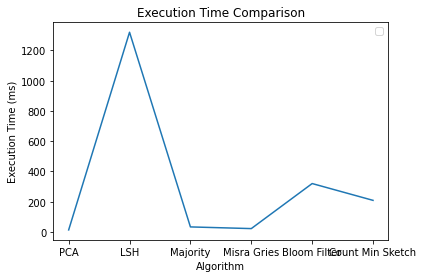

In [ ]:
import matplotlib.pyplot as plt
x = ['PCA','LSH','Majority','Misra Gries','Bloom Filter','Count Min Sketch']
y = [13.64,1320,33.48,22.367,320.048,208.97 ]
plt.xlabel("Algorithm")
plt.ylabel("Execution Time (ms)")
plt.title("Execution Time Comparison")
plt.plot(x,y)
plt.legend()
plt.show()